In [50]:
from sympy import N, pprint, plot, symbols
import matplotlib.pyplot as plt

In [57]:
# assert M is invertibile for unique solution
def poly_model(x: iter, y: iter, degree_n: int) -> str:
    ''' Given two iterables of x and y numbers in an integer degree-n polynomial, as well as the highest degree of x,
        return least-squares best fit as sympy expression.
        >>>lin_model([0, 1, 2, 3], [1, 3, 4, 4])
        x + 3/2
        >>>N(lin_model([2, 3, 5, 7, 9], [4, 5, 7, 10, 15]), 4) # from sympy import N
        1.518x + 0.3049
    '''
    from sympy import Matrix, symbols, ones
    from numpy import array
    # garbage filters
    assert x and isinstance(x, list|tuple), "x must be list of lists or tuples of ints or floats"
    assert y and isinstance(y, list|tuple), "y must be list or tuple of ints or floats"
    bad_values_x, bad_values_y = {}, {}
    for index, value in enumerate(x):
        if not isinstance(value, (int,float)):
            bad_values_x[index] = (value, type(value).__name__)
    for index, value in enumerate(y):
        if not isinstance(value, (int,float)):
            bad_values_y[index] = (value, type(value).__name__)
    assert not (bad_values_x or bad_values_y), ("input must be lists or tuples of ints or floats:\n"
                                                "\t\teach item reads index: (bad value, bad value type)\n"
                                                     f"\t\tx-vector: {bad_values_x}\n"
                                                     f"\t\ty-vector: {bad_values_y}")
    # initialization
    y = Matrix(y)
    x = array(x) # make x an ndarray so we can use vectorized operations
    M = []
    for degree in range(degree_n + 1):
        M.append(x**degree) 
    M = Matrix(M).T
    # the algorithm: linear algebra least-squares optimizer
    # a holds the coefficients of the equation y = a0 + a1 x + a2 x^2...+ an x^n
    a = (M.T @ M).inv() @ M.T @ y
    # initialize for printing
    x = symbols('x')
    return a

In [76]:
# acceleration 
a = N(poly_model(x=[.1, .2, .3, .4, .5], y=[-0.18, 0.31, 1.03, 2.48, 3.73], degree_n=2), 3); print("coefficient vector\n"); pprint(a)
# s = s0 + v0*t + (1/2)*g*t^2
# s  = vertical displacement downward
# s0 = initial displacement at time t = 0
# v0 = initial velocity at time t = 0
# g  = acceleration of gravity
print(("\n"
       "yields:\n"
       f"s   = {a[0]} + {a[1]}*t + (1/2)*{a[2]}*t^2\n"
       f"s0  = {a[0]} ft\n"
       f"v0  = {a[1]} ft\s\n"
       f"2*g = {2*a[2]} ft\s^2"))

coefficient vector

⎡-0.398⎤
⎢      ⎥
⎢0.347 ⎥
⎢      ⎥
⎣ 16.1 ⎦

yields:
s   = -0.398 + 0.347*t + (1/2)*16.1*t^2
s0  = -0.398 ft
v0  = 0.347 ft\s
2*g = 32.1 ft\s^2


In [46]:
from numpy import polyfit, round as nround
nround(polyfit([.1, .2, .3, .4, .5], [-0.18, 0.31, 1.03, 2.48, 3.73], 2), 2)

array([16.07,  0.35, -0.4 ])

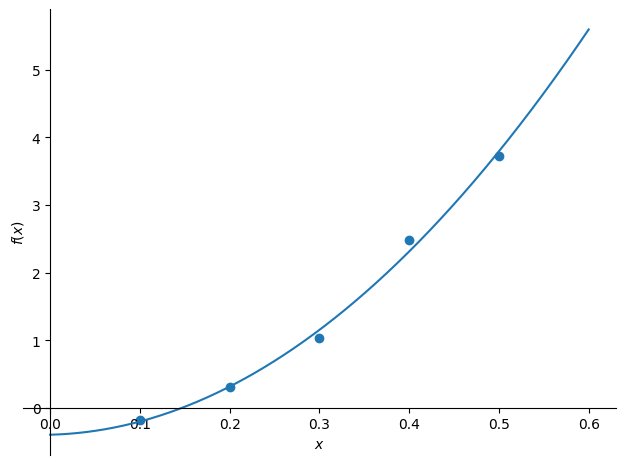

In [75]:
x = symbols('x')
fig, ax = plt.subplots()
ax.scatter([.1, .2, .3, .4, .5], [-0.18, 0.31, 1.03, 2.48, 3.73])
plot(a[0] + a[1]*x + a[2]*x**2, (x, 0, .6), fig=fig, ax=ax)

In [81]:
# (2, 0), (3, -8), (5, -35), (7, -70)
a = poly_model(x=[2, 3, 5, 7], y=[0, -8, -35, -70], degree_n=2); a

Matrix([
[ 2245/199],
[-1179/398],
[ -493/398]])

In [72]:
N(a,3)

Matrix([
[ 11.3],
[-2.96],
[-1.24]])

In [80]:
nround(polyfit([2, 3, 5, 7], [0, -8, -35, -70], 2), 2)

array([-1.24, -2.96, 11.28])

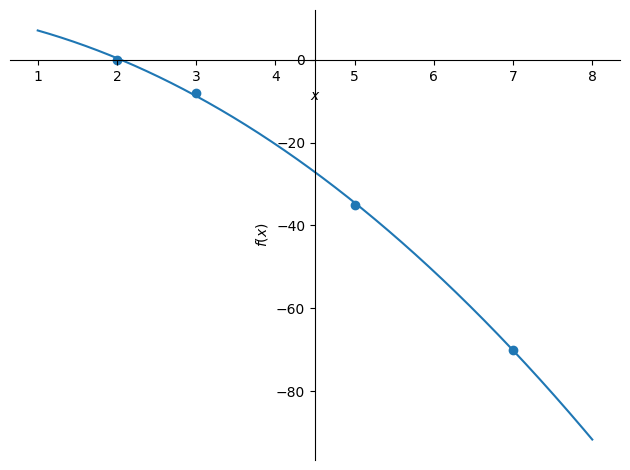

In [82]:
x = symbols('x')
fig, ax = plt.subplots()
ax.scatter([2, 3, 5, 7], [0, -8, -35, -70])
plot(a[0] + a[1]*x + a[2]*x**2, (x, 1, 8), fig=fig, ax=ax)